Royston Rex Fernandez - 201759033<br>
Asher Anil Kurian - 201755107<br>
Atshaya Srinivasan - 201774445<br>
Herman Basajjabalaba - 201766954

In [ ]:
!apt-get update && apt-get install swig cmake
!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4"

# Importing packages

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.logger import configure

# Setting up the logger 
This keeps a log of all the training data including loss, mean rewards, steps, etc

In [89]:
# Set up logger to logg the loss value
tmp_path = "log"
new_logger = configure(tmp_path, ["stdout", "csv"])

Logging to log


# Defining the environment
We set the environment to the Lunar Lander from Open AI Gymnasium

In [90]:
# Setting the environment
env = "LunarLander-v2"
vec_env = make_vec_env(env) # Wrapping the environment
model = DQN(
    "MlpPolicy", # Initialising with a deep neural netwrok architechture
    vec_env,
    verbose=1,
    exploration_final_eps=0.1,
    target_update_interval=250,
)

# Initialising the logger
model.set_logger(new_logger)

Using cpu device


# Training
We now train the agent with the MLP policy over 500000 timesteps for it to learn

In [92]:
# Train the agent
model.learn(total_timesteps=500000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.8     |
|    ep_rew_mean      | -193     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 968      |
|    time_elapsed     | 0        |
|    total_timesteps  | 371      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.758    |
|    n_updates        | 67       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.2     |
|    ep_rew_mean      | -227     |
|    exploration_rate | 0.987    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 927      |
|    time_elapsed     | 0        |
|    total_timesteps  | 746      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.9      |
|    n_updates      

# Saving and loading the model
We now save the model and load it for evaluation

In [93]:
# Saving the model
model.save("dqn_lunar")

In [94]:
# Loading the model
model = DQN.load("dqn_lunar")

# Evaluation
We evaluate the model by running it for 1000 episodes were we monitor its reward 

In [96]:
# Evaluate the agent's performance over 1000 episodes
n_eval_episodes = 1000
episode_rewards = []
for count in range(n_eval_episodes):
    obs = vec_env.reset()
    # Reset the episode reward for each episode
    episode_reward = 0
    while True:
        # Predict the next action based on current state
        action, _ = model.predict(obs)
        # Record the reward and next state
        obs, reward, done, _ = vec_env.step(action)
        # Store the cummulative reward
        episode_reward += reward
        # Terminate when the episode ends
        if done:
            episode_rewards.append(episode_reward)
            break

# Plotting the graphs
We plot the training loss and rewards that the agent recieved

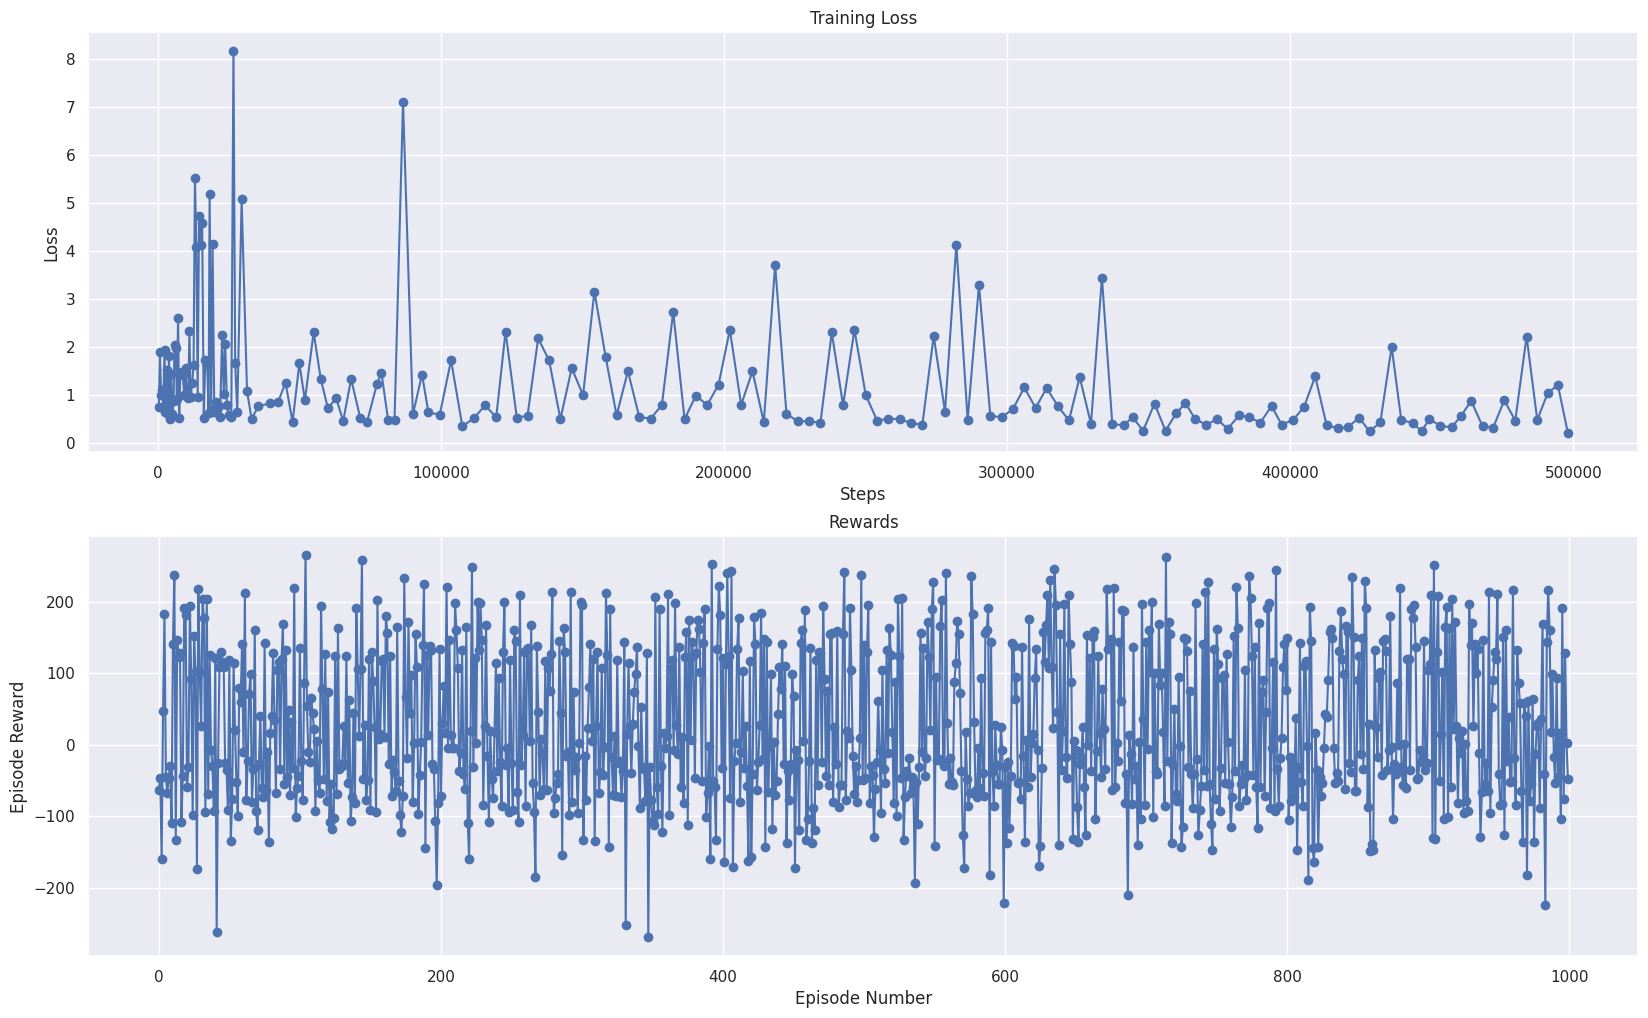

In [121]:
# Read the log data from progress.csv
df = pd.read_csv("/content/log/progress.csv")

# Extract and loss columns
loss = df['train/loss']
steps = df['time/total_timesteps']

# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot loss against steps
axs[0].plot(steps, loss, marker='o')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

# Plot reward against episodes
axs[1].plot(episode_rewards, marker='o')
axs[1].set_title('Rewards')
axs[1].set_xlabel('Episode Number')
axs[1].set_ylabel('Episode Reward')
axs[1].grid(True)

plt.show()

# Saving a video
We save a video of an episode to visualise how the agent performs after training

In [129]:
# Initialize video writer
height, width, _ = vec_env.render(mode='rgb_array').shape
out = cv2.VideoWriter('episode_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

# Reset environment
obs = vec_env.reset()

# Run the episode until the episode ends
while True:
    action, _ = model.predict(obs)
    obs, reward, done, _ = vec_env.step(action)
    frame = vec_env.render(mode='rgb_array')
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    if done:
        break

# Release video writer
out.release()

In [ ]:
# Close the environment
vec_env.close()